# Regularized logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
from logistic_regressor import LogisticRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


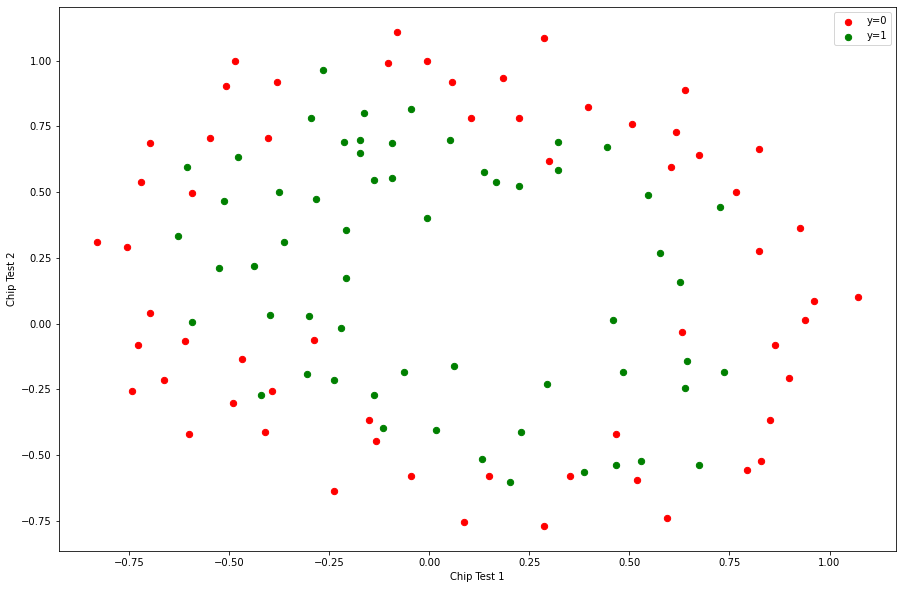

In [2]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print('Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...')
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()

In [3]:
XX = np.vstack([np.ones((X.shape[0],)),X.T]).T
from logistic_regressor import RegLogisticRegressor
log_reg1 = RegLogisticRegressor()
theta = np.ones((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y,100)
grad = log_reg1.grad_loss(theta,XX,y,100)

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Theta found by fmin_bfgs: [ 0.02188603 -0.01748169  0.00571031 -0.0551694  -0.01314888 -0.03859919
 -0.01846356 -0.00773236 -0.00892434 -0.02280491 -0.04343876 -0.00235623
 -0.01415631 -0.00349509 -0.04143634 -0.02100597 -0.00471924 -0.00359133
 -0.00632236 -0.00502443 -0.03197706 -0.03416353 -0.00107628 -0.00702623
 -0.00038506 -0.0079824  -0.00154778 -0.04108711]
Final loss = 0.6804


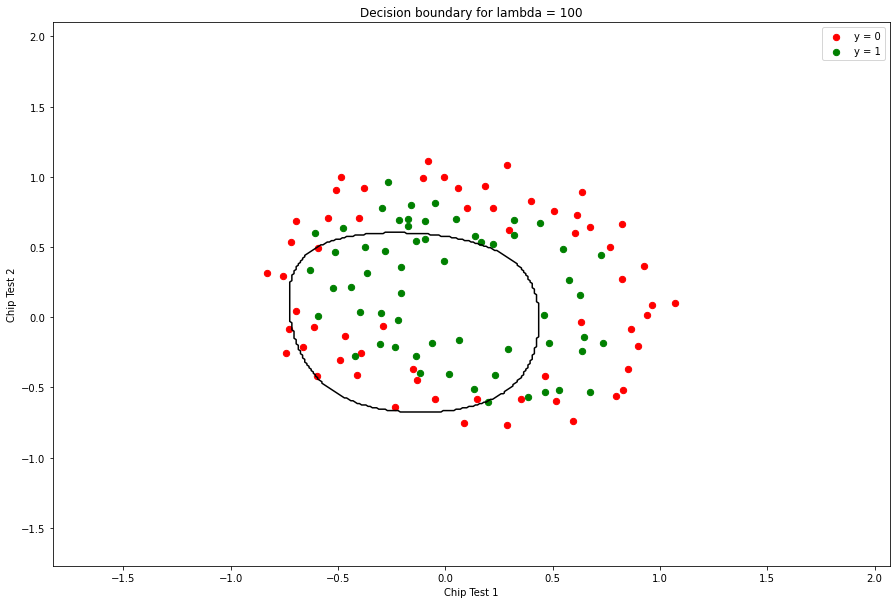

In [9]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 100
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print('Theta found by fmin_bfgs: %s' %theta_opt)
print("Final loss = %.4f" %reg_lr1.loss(theta_opt,XX,y,0.0))

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()


In [5]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
accuracy = 1.0*np.sum((predy == y))/ predy.shape[0]
print("Accuracy on the training set = %.4f" %accuracy)

Accuracy on the training set = 0.7458


# Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg: [[ 0.00468635 -0.01726848  0.0064196  -0.05402665 -0.01327551 -0.03727145
  -0.01821195 -0.00761037 -0.00885306 -0.02224573 -0.04288369 -0.00238585
  -0.01393196 -0.00354828 -0.04072376 -0.02078577 -0.00467203 -0.00354978
  -0.00624894 -0.00500393 -0.03153159 -0.03381515 -0.00108319 -0.00694192
  -0.0003945  -0.00788595 -0.00157683 -0.04058858]]
Loss with sklearn theta: 0.6806


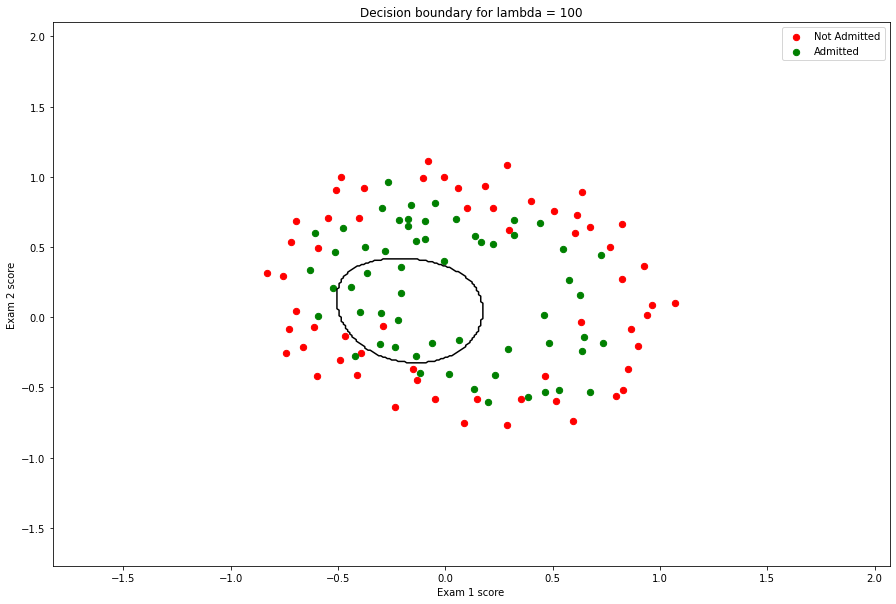

Computing regularization path ...


/Users/mikey/miniforge3/envs/enc_tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


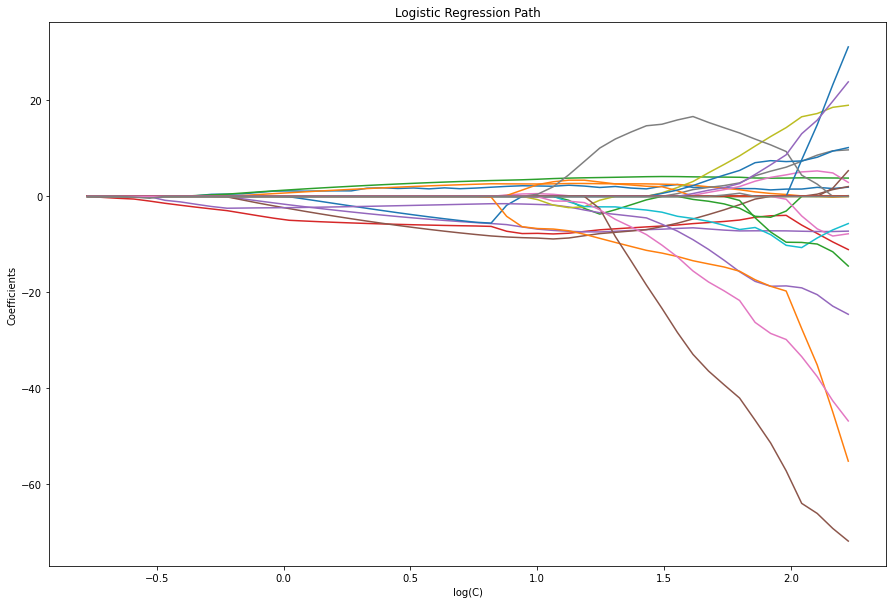

In [14]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg =100

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

plot_utils.plot_regularization_path(XX,y)
plt.show()

# L1 regularized logistic regression

Theta found by sklearn with L1 reg: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Loss with sklearn theta: 0.6931


/Users/mikey/Library/Mobile Documents/com~apple~CloudDocs/Documents/Rice/Courses/COMP540-Statistical ML/Assignments/A2/logreg/plot_utils.py:103: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])


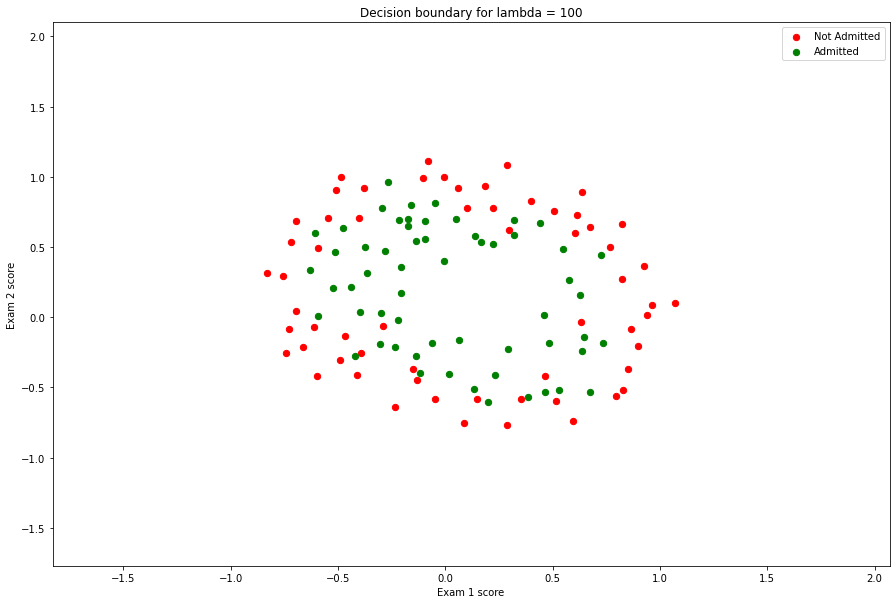

Computing regularization path ...


/Users/mikey/miniforge3/envs/enc_tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


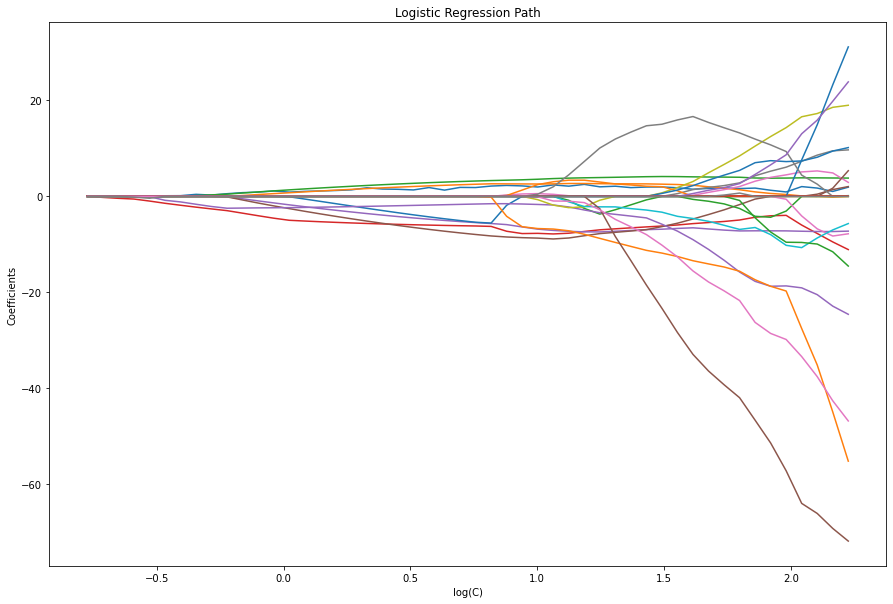

In [15]:
# L1 regularization witk sklearn LogisticRegression


sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()